In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Breast Cancer dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df = df.drop(['id','Unnamed: 32'],axis=1)

In [4]:
oh = LabelEncoder()
oh =oh.fit_transform(df['diagnosis'])
df['diagnosis'] = oh
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


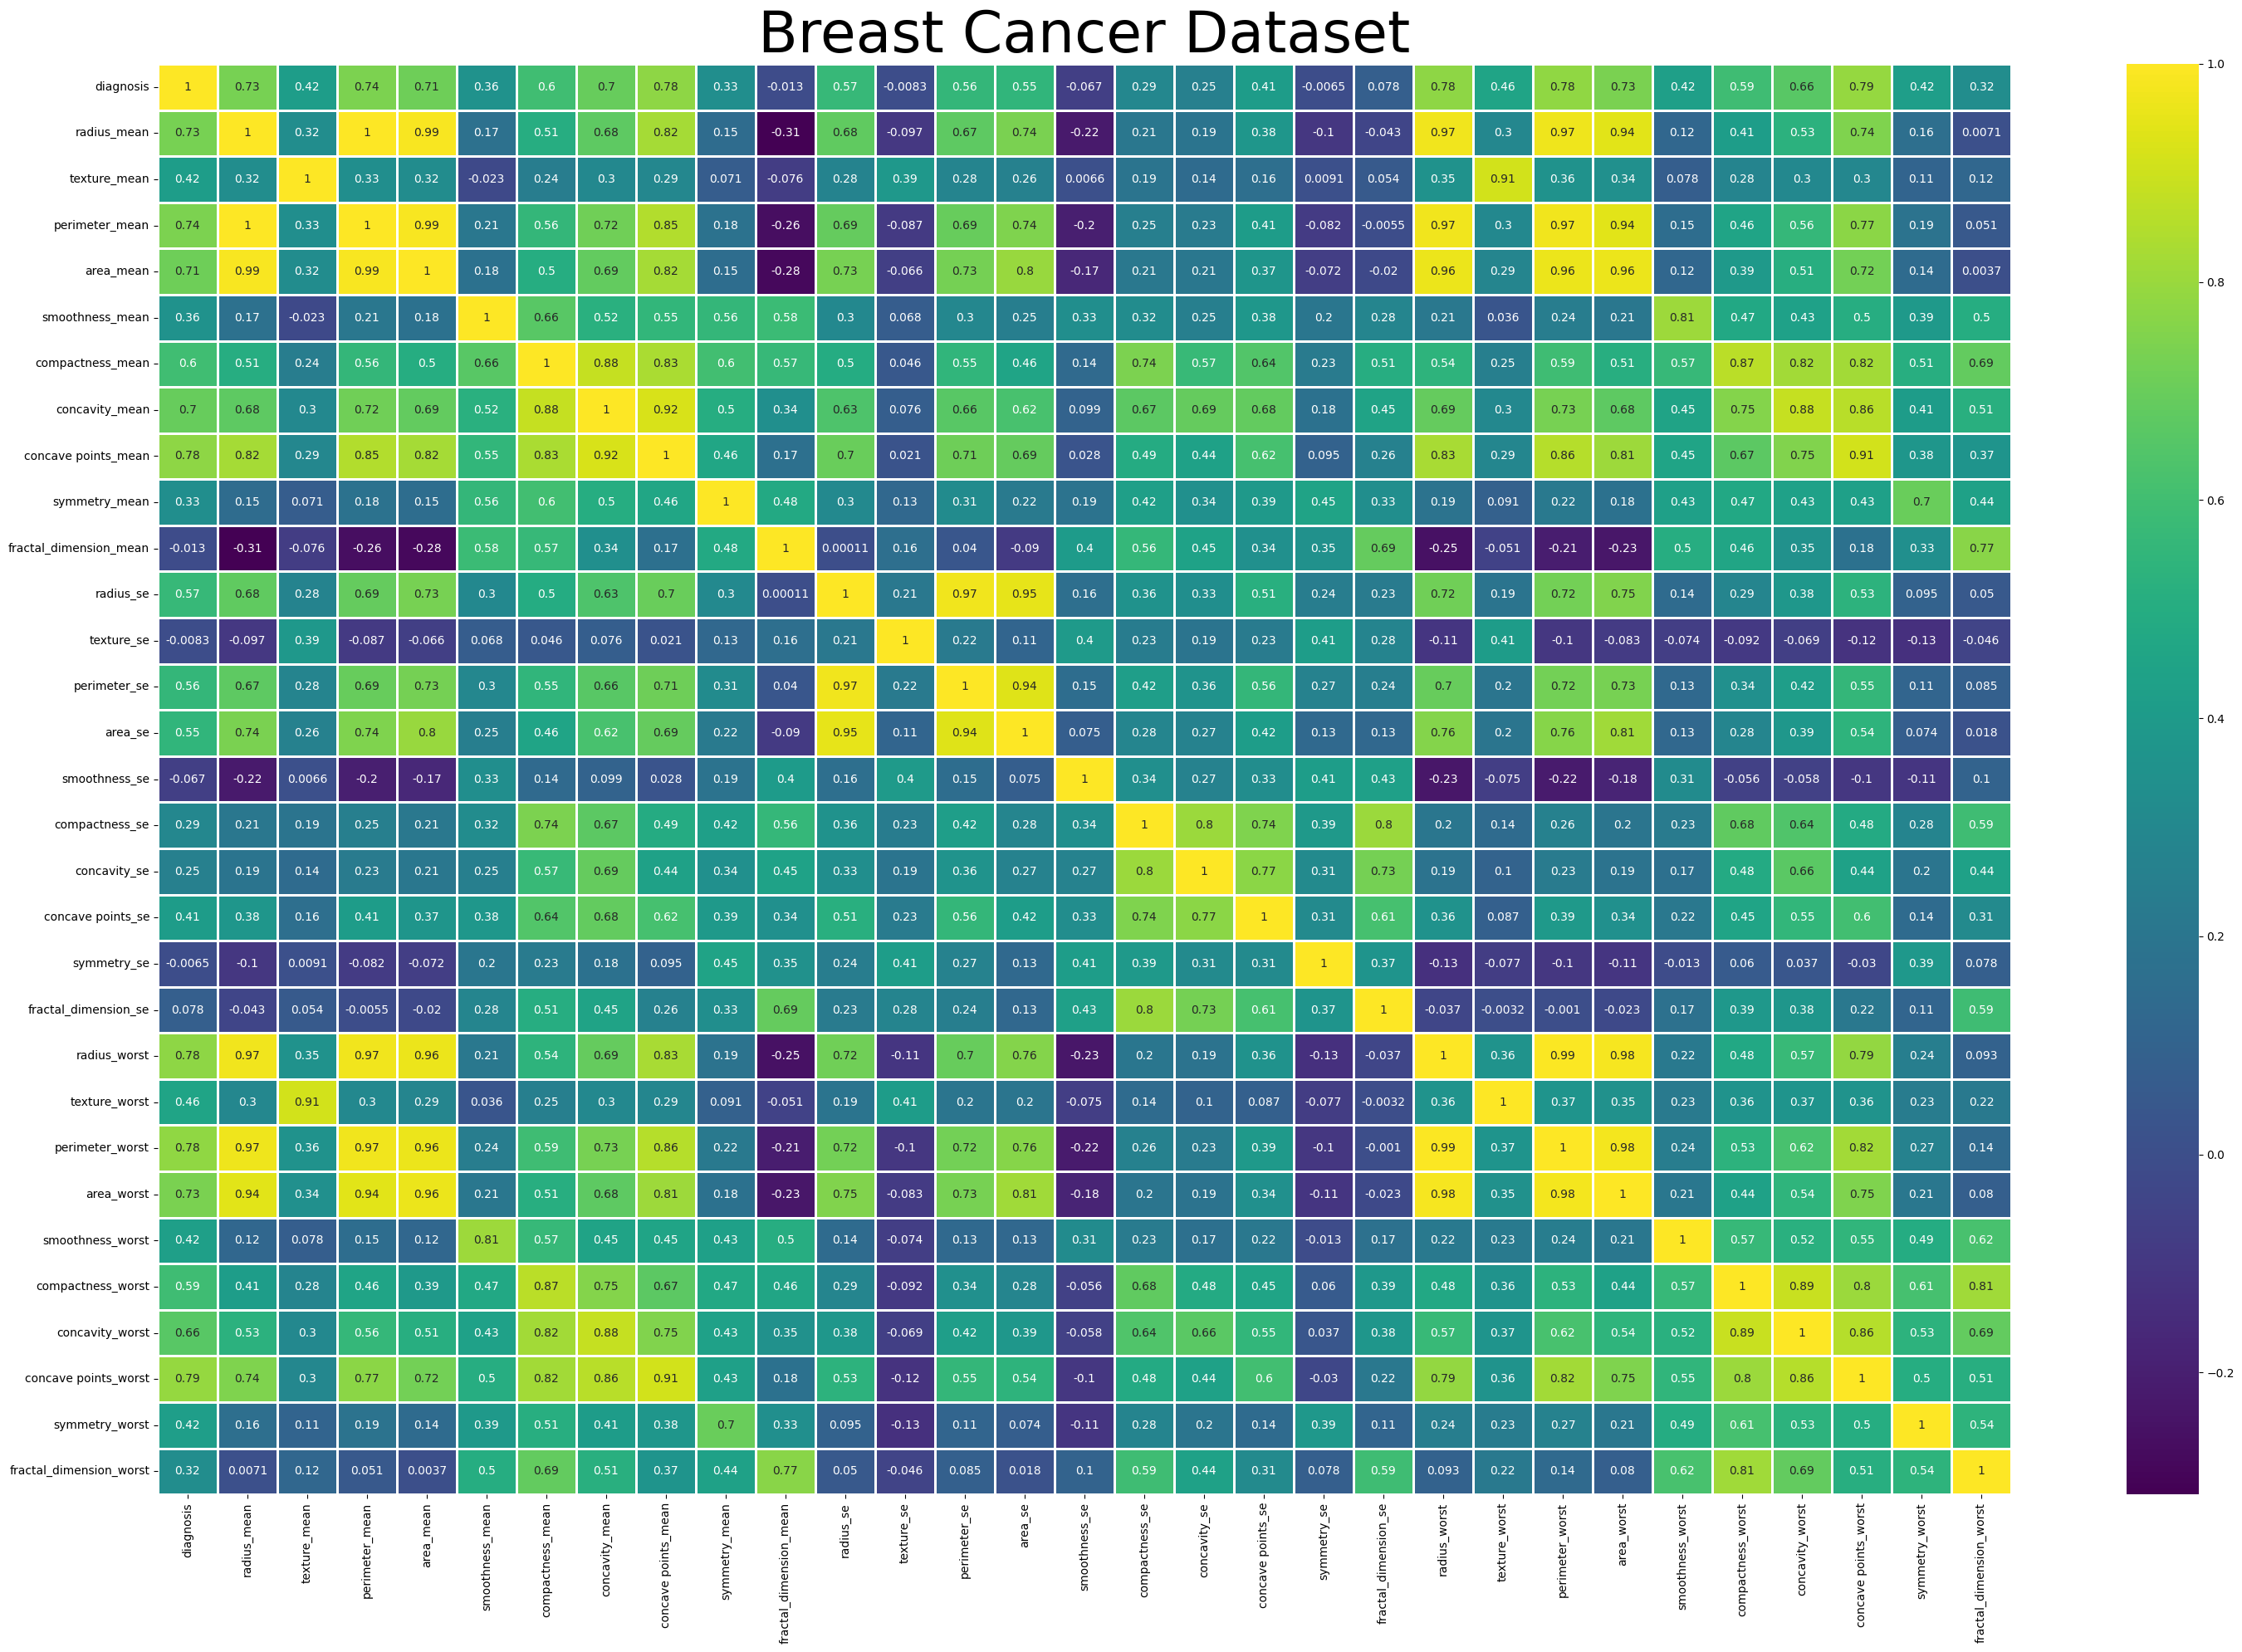

In [5]:
plt.figure(figsize=(30,20))
plt.title("Breast Cancer Dataset",fontsize=50,ha='center')
sns.heatmap(df.corr(),annot=True,linewidths=1, cmap='viridis')
plt.tight_layout()

<Axes: ylabel='count'>

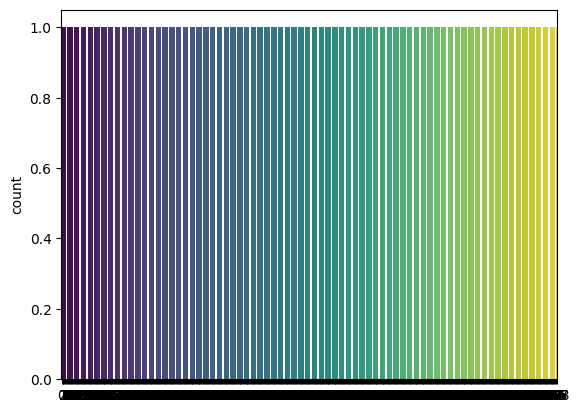

In [6]:
sns.countplot(df['diagnosis'],label='count',palette="viridis")

In [7]:
df['diagnosis'].value_counts(normalize=True)*100

,proportion
diagnosis,
0,62.741652
1,37.258348


In [15]:
df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [16]:
df.duplicated().sum()

np.int64(0)

In [8]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
y.value_counts()

,count
diagnosis,
0,357
1,212


In [10]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Text(0, 0.5, 'Principal Component 2')

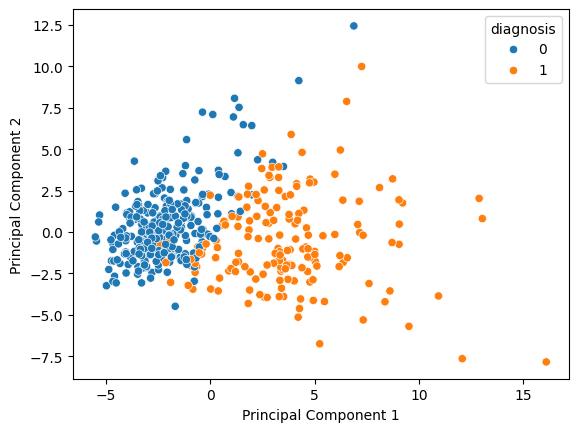

In [12]:
pipe = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=2))
])

x_pca = pipe.fit_transform(x_train,x_test)
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [15]:
lgr_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('pca',PCA()),
    ('classifier',LogisticRegression())
])

param_grid = {
    'pca__n_components': np.arange(1, x_train.shape[1]//3),
    'classifier__C': np.logspace(0,1,10)
}

lgr_model = GridSearchCV(lgr_pipe,param_grid,verbose=1, n_jobs=-1)
lgr_model.fit(x_train,y_train)
print('Best params: {}'.format(lgr_model.best_params_))
print('Traning Score: {}'.format(lgr_model.score(x_train,y_train)))
print('CV Score: {}'.format(lgr_model.best_score_))
print('Test Score: {}'.format(lgr_model.score(x_test,y_test)))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best params: {'classifier__C': np.float64(1.0), 'pca__n_components': np.int64(9)}
Traning Score: 0.9868131868131869
CV Score: 0.9736263736263737
Test Score: 0.9824561403508771


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



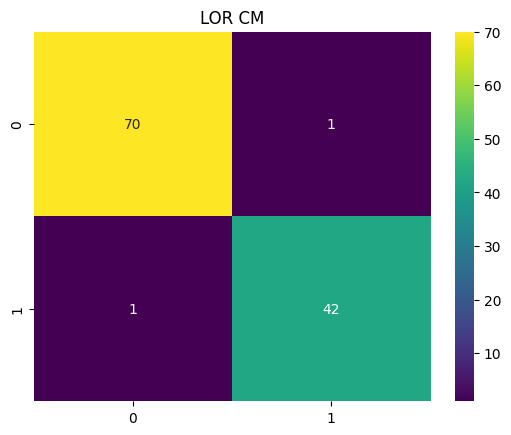

In [16]:
y_pred = lgr_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
plt.title('LOR CM')
print(classification_report(y_test,y_pred))

In [18]:
DTC_pipe = Pipeline(steps = [
    ('scaler',StandardScaler()),
    ('pca',PCA()),
    ('classifier',DecisionTreeClassifier())
])

param_grid = {'pca__n_components': np.arange(1,x_train.shape[1]//3)}

DTC_model = GridSearchCV(DTC_pipe,param_grid,verbose=1,n_jobs=-1)
DTC_model.fit(x_train,y_train)
print('Best params: {}'.format(DTC_model.best_params_))
print('Traning Score: {}'.format(DTC_model.score(x_train,y_train)))
print('CV Score: {}'.format(DTC_model.best_score_))
print('Test Score: {}'.format(DTC_model.score(x_test,y_test)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best params: {'pca__n_components': np.int64(3)}
Traning Score: 1.0
CV Score: 0.9186813186813187
Test Score: 0.9385964912280702


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



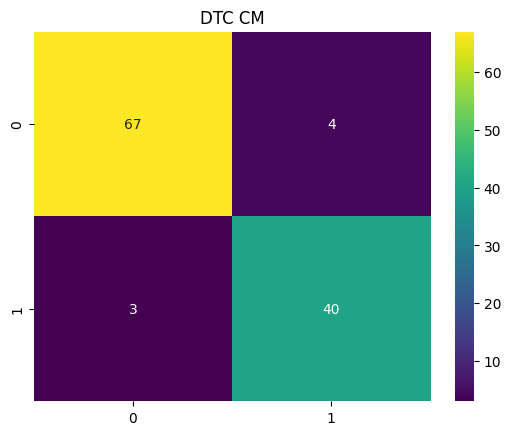

In [20]:
y_pred = DTC_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
plt.title('DTC CM')
print(classification_report(y_test,y_pred))

In [21]:
rdf_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('rdf',RandomForestClassifier())
])

param_grid = {
    'rdf__n_estimators': (200,1001,200),
    'rdf__max_depth': np.arange(1,4)
}

rdf_model = GridSearchCV(rdf_pipe,param_grid,verbose=1,n_jobs=-1)
rdf_model.fit(x_train,y_train)
print('Best params: {}'.format(rdf_model.best_params_))
print('Traning Score: {}'.format(rdf_model.score(x_train,y_train)))
print('CV Score: {}'.format(rdf_model.best_score_))
print('Test Score: {}'.format(rdf_model.score(x_test,y_test)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best params: {'rdf__max_depth': np.int64(3), 'rdf__n_estimators': 1001}
Traning Score: 0.9802197802197802
CV Score: 0.9516483516483516
Test Score: 0.9649122807017544


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

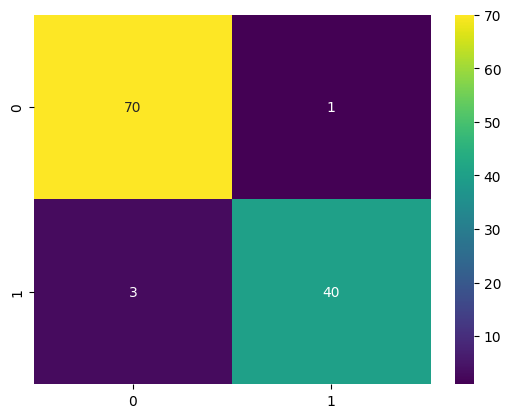

In [22]:
y_pred = rdf_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
plt

In [24]:
knn_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('pca',PCA()),
    ('knn',KNeighborsClassifier())
])

param_grid = {
    'pca__n_components': np.arange(1,x_train.shape[1]+1),
    'knn__n_neighbors': np.arange(1,x_train.shape[1],2)
}

knn_model = GridSearchCV(knn_pipe,param_grid=param_grid,verbose=1,n_jobs=-1)
knn_model.fit(x_train,y_train)

print('Best params: {}'.format(knn_model.best_params_))
print('Traning Score: {}'.format(knn_model.score(x_train,y_train)))
print('CV Score: {}'.format(knn_model.best_score_))
print('Test Score: {}'.format(knn_model.score(x_test,y_test)))

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
Best params: {'knn__n_neighbors': np.int64(5), 'pca__n_components': np.int64(12)}
Traning Score: 0.9802197802197802
CV Score: 0.9626373626373628
Test Score: 0.956140350877193


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



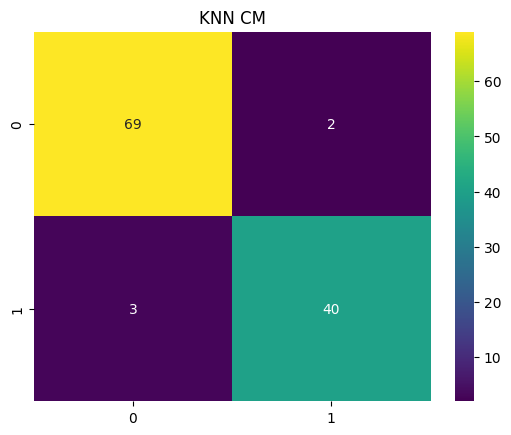

In [25]:
y_pred = knn_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
plt.title('KNN CM')
print(classification_report(y_test,y_pred))

In [28]:
gnb = Pipeline(steps=[
  ('scaler',StandardScaler()),
  ('pca',PCA()),
  ('gnb',GaussianNB())
])

param_grid = {
    'pca__n_components': np.arange(1,x_train.shape[1]+1)
}

gnb_model = GridSearchCV(gnb,param_grid=param_grid,verbose=1,n_jobs=-1)
gnb_model.fit(x_train,y_train)
print('Best params: {}'.format(gnb_model.best_params_))
print('Traning Score: {}'.format(gnb_model.score(x_train,y_train)))
print('CV Score: {}'.format(gnb_model.best_score_))
print('Test Score: {}'.format(gnb_model.score(x_test,y_test)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'pca__n_components': np.int64(5)}
Traning Score: 0.9274725274725275
CV Score: 0.9252747252747253
Test Score: 0.9473684210526315


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



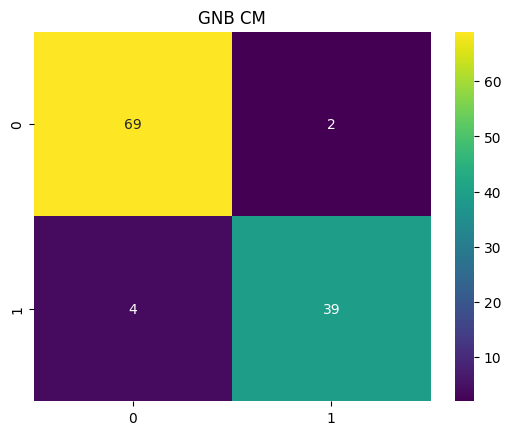

In [31]:
y_pred = gnb_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
plt.title('GNB CM')
print(classification_report(y_test,y_pred))

In [35]:
svc_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('pca',PCA()),
    ('svc',SVC())
])

param_grid = {
    'pca__n_components': np.arange(1,x_train.shape[1]//3),
    'svc__C': np.logspace(0,3,10),
    'svc__kernel': ['rbf'],
    'svc__gamma': np.logspace(-4,-3,10)
}

svc_model = GridSearchCV(svc_pipe,param_grid=param_grid,verbose=1,n_jobs=-1)
svc_model.fit(x_train,y_train)
print('Best params: {}'.format(svc_model.best_params_))
print('Traning Score: {}'.format(svc_model.score(x_train,y_train)))
print('CV Score: {}'.format(svc_model.best_score_))
print('Test Score: {}'.format(svc_model.score(x_test,y_test)))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best params: {'pca__n_components': np.int64(9), 'svc__C': np.float64(46.41588833612777), 'svc__gamma': np.float64(0.00035938136638046257), 'svc__kernel': 'rbf'}
Traning Score: 0.978021978021978
CV Score: 0.9758241758241759
Test Score: 0.9912280701754386


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



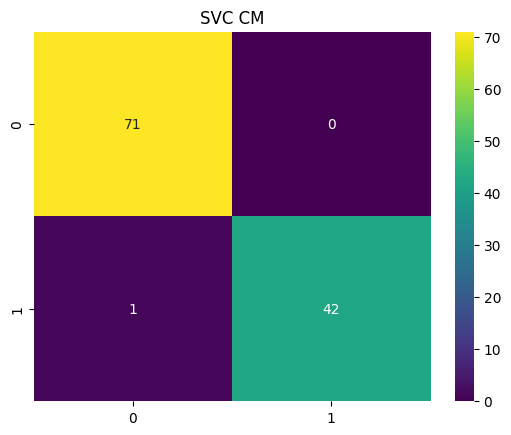

In [36]:
y_pred = svc_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
plt.title('SVC CM')
print(classification_report(y_test,y_pred))

In [40]:
xgb = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('pca',PCA()),
    ('xgb',XGBClassifier())
])

param_grid = {
    'xgb__n_estimators': [50],
    'xgb__learning_rate': (-3,0,10),
    'xgb__max_depth': np.arange(1,6),
    'xgb__gamma': np.arange(0,1.0,0.1),
    'xgb__reg_lambda': np.logspace(-3, 3, 10)
}

xgb_model = GridSearchCV(xgb,param_grid=param_grid,verbose=1,n_jobs=-1)
xgb_model.fit(x_train,y_train)
print('Best params: {}'.format(xgb_model.best_params_))
print('Traning Score: {}'.format(xgb_model.score(x_train,y_train)))
print('CV Score: {}'.format(xgb_model.best_score_))
print('Test Score: {}'.format(xgb_model.score(x_test,y_test)))

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
Best params: {'xgb__gamma': np.float64(0.0), 'xgb__learning_rate': 10, 'xgb__max_depth': np.int64(2), 'xgb__n_estimators': 50, 'xgb__reg_lambda': np.float64(215.44346900318823)}
Traning Score: 1.0
CV Score: 0.9582417582417582
Test Score: 0.9385964912280702


              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



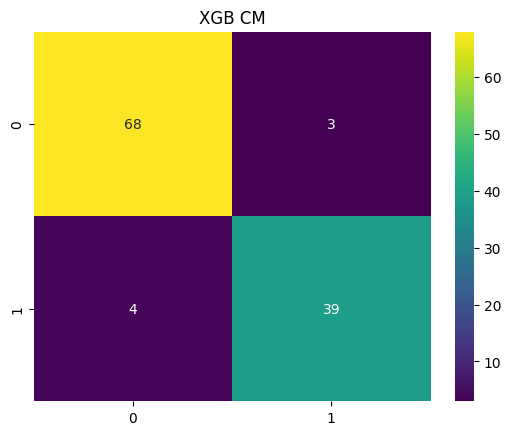

In [41]:
y_pred = xgb_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
plt.title('XGB CM')
print(classification_report(y_test,y_pred))